In [21]:
import numpy as np
from few import FEW
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import time
from tqdm import tqdm 
#print(vars(FEW))
import inspect
#print(inspect.getfile(FEW))
def compare_configs(estimators,X,y,classification=False):
    """routine that compares a list of estimators evaluated on a set of data"""
    if classification:
        cv = StratifiedKFold(n_splits=3,shuffle=True)
    else:
        cv = KFold(n_splits=5,shuffle=True)

    trials = 10
    scores = np.ndarray((len(estimators),trials))
    times = np.zeros((len(estimators),trials))
    
    for e,est in tqdm(enumerate(estimators)):
        for t in np.arange(trials):
            t0 = time.time()
            scores[e,t] = np.mean(cross_val_score(est,X,y,cv=cv,n_jobs=-1))
            times[e,t] = time.time() - t0
    
    return scores, times


{'__module__': 'few.few', '__doc__': 'FEW uses GP to find a set of transformations from the original feature\n    space that produces the best performance for a given machine learner.\n    ', 'update_checked': False, '__init__': <function FEW.__init__ at 0x115271ae8>, 'fit': <function FEW.fit at 0x115271b70>, 'transform': <function FEW.transform at 0x115271bf8>, 'impute_data': <function FEW.impute_data at 0x115271c80>, 'clean': <function FEW.clean at 0x115271d08>, 'clean_with_zeros': <function FEW.clean_with_zeros at 0x115271d90>, 'predict': <function FEW.predict at 0x115271e18>, 'fit_predict': <function FEW.fit_predict at 0x115271ea0>, 'score': <function FEW.score at 0x115271f28>, 'export': <function FEW.export at 0x115255048>, 'print_model': <function FEW.print_model at 0x1152550d0>, 'representation': <function FEW.representation at 0x115255158>, 'valid_loc': <function FEW.valid_loc at 0x1152551e0>, 'valid': <function FEW.valid at 0x115255268>, 'get_params': <function FEW.get_params 

--- lasso ---


0it [00:00, ?it/s]

problem: concrete


2it [00:48, 23.03s/it]
0it [00:00, ?it/s]

problem: enc


2it [00:38, 18.66s/it]
0it [00:00, ?it/s]

problem: housing


2it [00:39, 19.36s/it]
0it [00:00, ?it/s]

problem: uball5d


2it [01:21, 41.53s/it]
0it [00:00, ?it/s]

problem: yacht


2it [00:35, 17.68s/it]


--- decision tree ---


0it [00:00, ?it/s]

problem: concrete


2it [00:28, 14.10s/it]
0it [00:00, ?it/s]

problem: enc


2it [00:17,  8.77s/it]
0it [00:00, ?it/s]

problem: housing


2it [00:21, 11.09s/it]
0it [00:00, ?it/s]

problem: uball5d


2it [02:47, 85.70s/it]
0it [00:00, ?it/s]

problem: yacht


2it [00:12,  6.30s/it]


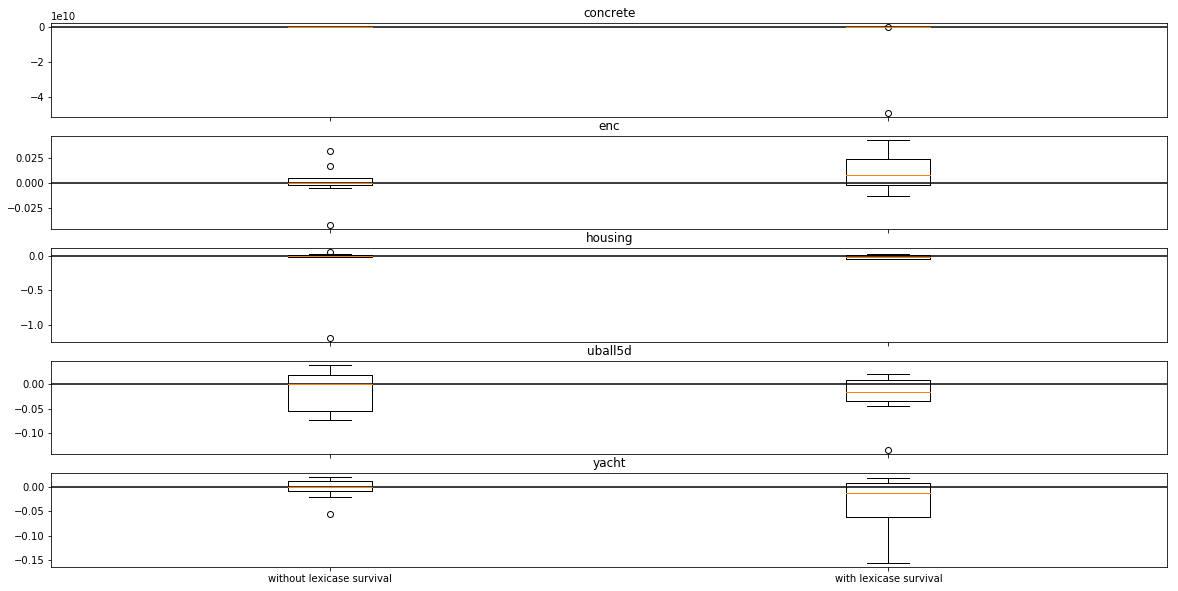

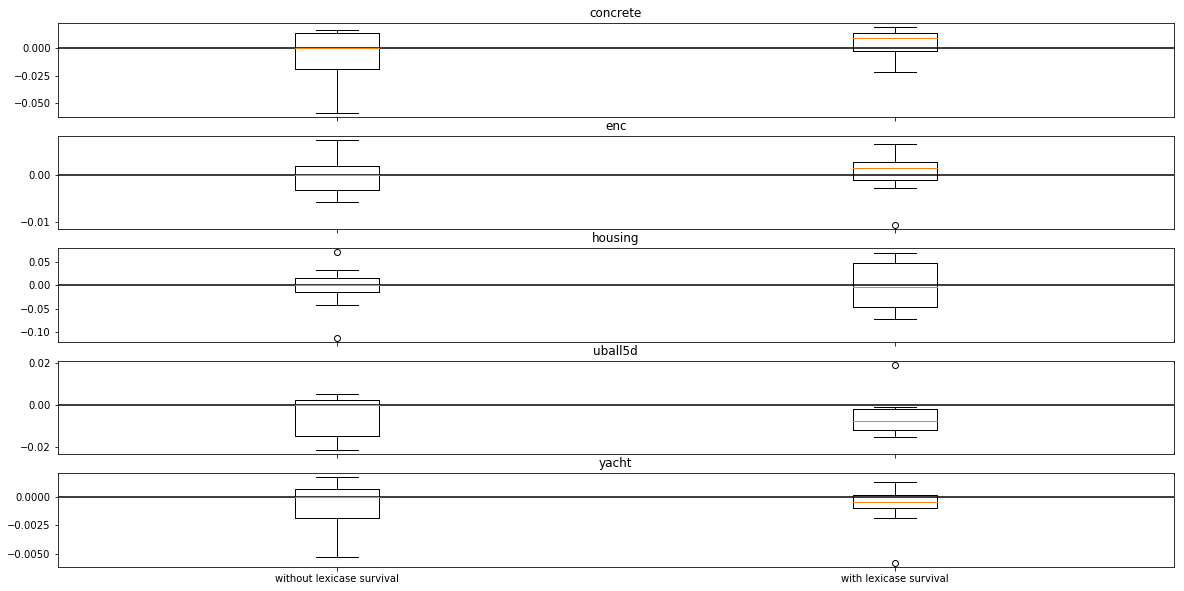

In [22]:
# define FEW configurations to compare

from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

estimators = {}
estimators['lasso'] = []
estimators['dt'] = []
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=5, lex_size=False))
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=5, lex_size=True))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=5,lex_size=False))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=5, lex_size=True))
problems = ['concrete','enc','housing','uball5d','yacht']
# problems = ['enc','housing']
###################################################################################################### lasso
print('--- lasso ---')
h,ax = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['lasso'],X,y)
    norm_scores = scores - np.median(scores[0,:])
    # plot results
    ax[i].boxplot(list(norm_scores))
    ax[i].plot([0,3],[0,0],'-k')
    ax[i].set_xticklabels(['without lexicase survival', 'with lexicase survival'])
    ax[i].set_title(p)
################################################################################################## decision tree
print('--- decision tree ---')
h2,ax2 = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['dt'],X,y)
    norm_scores = scores - np.median(scores[0,:])
    # plot results
    ax2[i].boxplot(list(norm_scores))
    ax2[i].plot([0,3],[0,0],'-k')
    ax2[i].set_xticklabels(['without lexicase survival', 'with lexicase survival'])
    ax2[i].set_title(p)

plt.show()

In [ ]:
# define FEW configurations to compare

from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

estimators = {}
estimators['logreg'] = []
estimators['dt'] = []
estimators['logreg'].append(FEW(ml=LogisticRegressionCV(),generations=5, lex_size=False,classification=True))
estimators['logreg'].append(FEW(ml=LogisticRegressionCV(),generations=5, lex_size=True,classification=True))
estimators['dt'].append(FEW(ml=DecisionTreeClassifier(),generations=5, lex_size=False,classification=True))
estimators['dt'].append(FEW(ml=DecisionTreeClassifier(),generations=5, lex_size=True,classification=True))
problems = ['heart','bc_clean','yeast','seg','wav']
# problems = ['enc','housing']
########################################################################################### logistic regression
print('--- logistic regression ---')
h,ax = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('class',axis=1).values)
    y = input_data['class'].values
    scores,times = compare_configs(estimators['logreg'],X,y)
    norm_scores = scores - np.median(scores[0,:])
    # plot results
    ax[i].boxplot(list(norm_scores))
    ax[i].plot([0,3],[0,0],'-k')
    ax[i].set_xticklabels(['without lexicase survival', 'with lexicase survival'])
    ax[i].set_title(p)
################################################################################################## decision tree
print('--- decision tree ---')
h2,ax2 = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('class',axis=1).values)
    y = input_data['class'].values
    scores,times = compare_configs(estimators['dt'],X,y)
    norm_scores = scores - np.median(scores[0,:])
    # plot results
    ax2[i].boxplot(list(norm_scores))
    ax2[i].plot([0,3],[0,0],'-k')
    ax2[i].set_xticklabels(['without lexicase survival', 'with lexicase survival'])
    ax2[i].set_title(p)

plt.show()

--- logistic regression ---


0it [00:00, ?it/s]

problem: heart


2it [03:15, 96.98s/it]
0it [00:00, ?it/s]

problem: bc_clean


2it [02:43, 81.15s/it]
0it [00:00, ?it/s]

problem: yeast


1it [23:05, 1385.75s/it]